In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [7]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

In [8]:
def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [9]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
#     """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
#     """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X.flatten())
        for i in range(len(r)):
            r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

#             """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

#             """
#             Probability for each datapo


#          x_i to belong to gaussian g 
#             """
            r = self.calculate_prob(r)


#             """Plot the data"""
            self.plot(r)
            
#             """M-Step"""

#             """calculate m_c"""
            m_c = []
            # write code here
            for i in range(len(r[0])):
                m = np.sum(r[:,i])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
            
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            print ("Updated mu= ",self.mu)

            var_c = []
            #write code here
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            print ("Updated var= ", var_c)
            plt.show()


# preprocess Data

In [ ]:
def pcaProcessing0(X_data):
    pca = PCA(n_components = 50)
    pca.fit(X_data)
    X_data = pca.transform(X_data)
    return X_data

# Standardize the data

In [ ]:


def standardize(X):
    X_standardized = (X - X.mean()) /X.std()
    return X_standardized


(180,)
Updated mu=  [-10.57714486  14.13038249   4.6187292 ]
Updated var=  [array([[79.81717667]]), array([[60.02730873]]), array([[2.39987419]])]


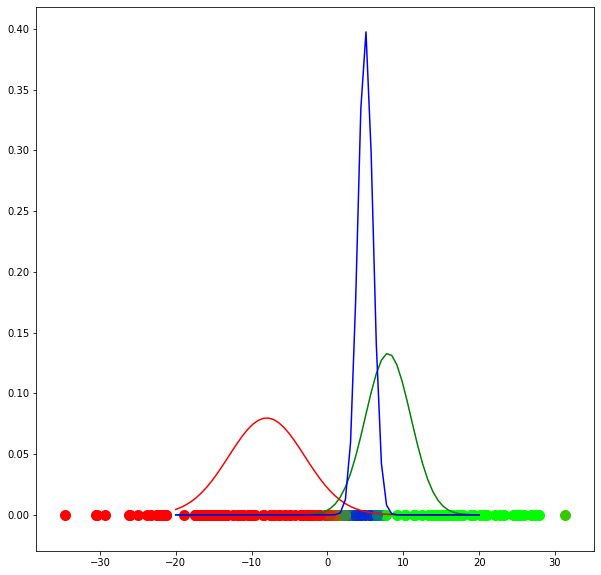

Updated mu=  [-9.94344583 16.56728117  4.37542141]
Updated var=  [array([[79.20104065]]), array([[38.09285508]]), array([[2.56918726]])]


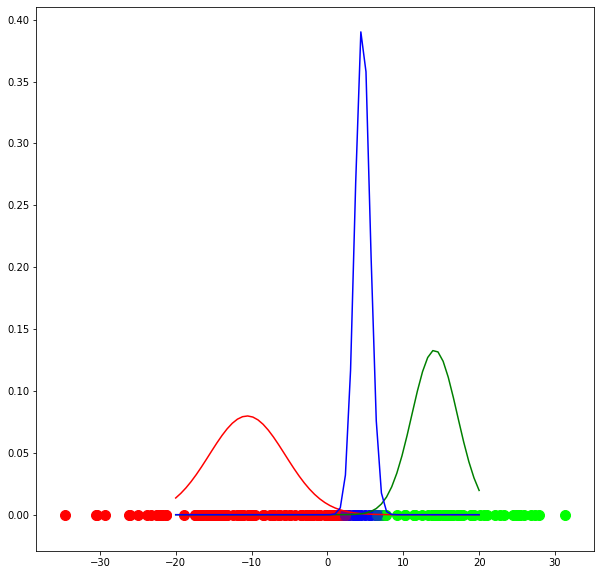

Updated mu=  [-9.89892805 17.32669601  4.65940917]
Updated var=  [array([[80.4880056]]), array([[33.20662037]]), array([[3.30852258]])]


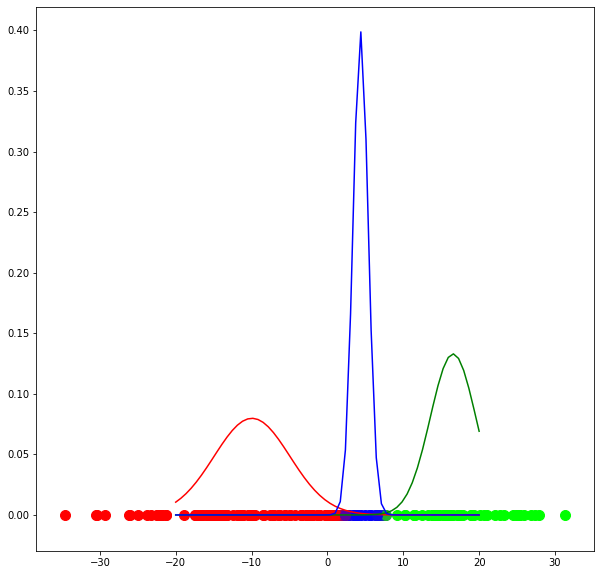

Updated mu=  [-9.85052185 17.75803952  5.05044082]
Updated var=  [array([[80.39990785]]), array([[30.18685535]]), array([[3.42946938]])]


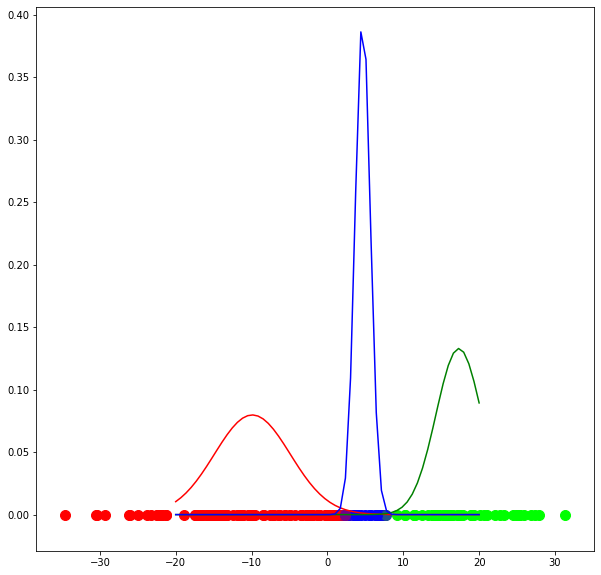

Updated mu=  [-9.72404555 17.92031239  5.37073072]
Updated var=  [array([[80.70693722]]), array([[28.99246225]]), array([[3.13368849]])]


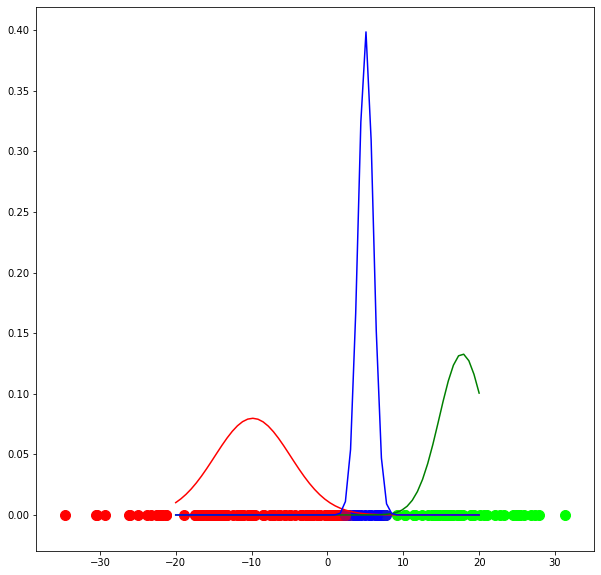

Updated mu=  [-9.57871787 17.96412753  5.58828356]
Updated var=  [array([[81.4401801]]), array([[28.68639129]]), array([[2.81251751]])]


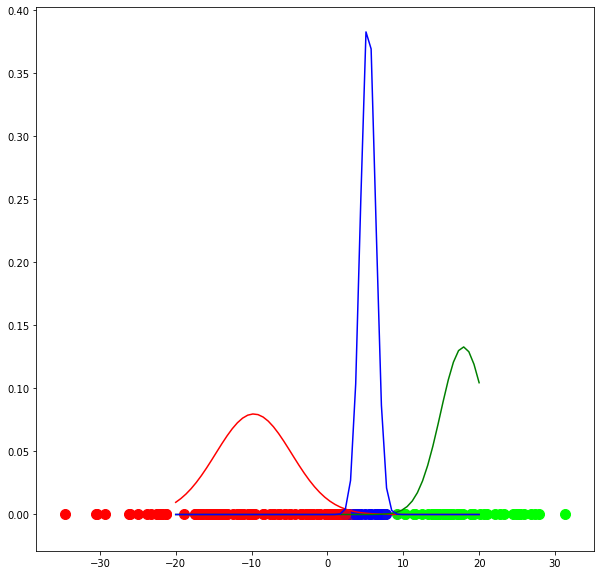

Updated mu=  [-9.46902679 17.98689257  5.73474646]
Updated var=  [array([[82.07649668]]), array([[28.5443295]]), array([[2.60814336]])]


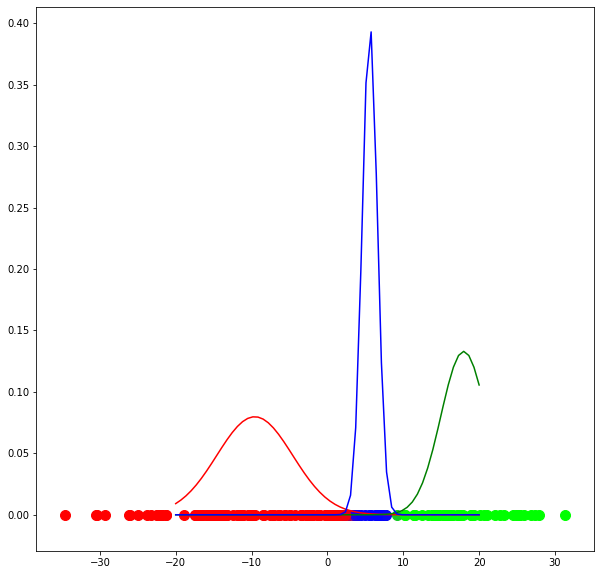

Updated mu=  [-9.39285838 18.00396657  5.8353339 ]
Updated var=  [array([[82.54020618]]), array([[28.44313801]]), array([[2.4871683]])]


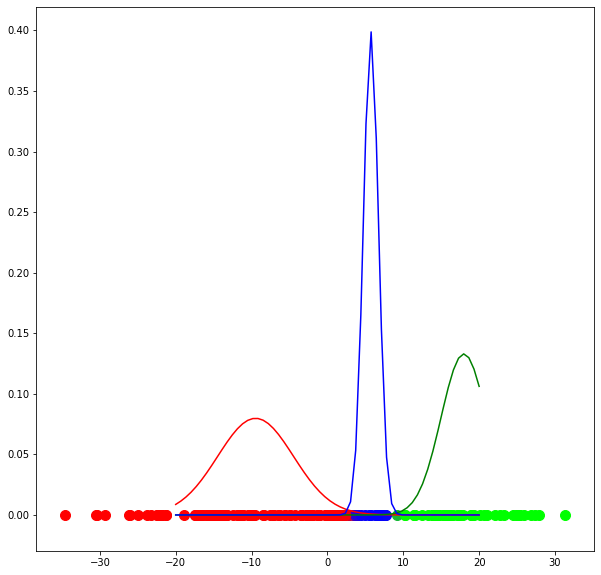

Updated mu=  [-9.33934103 18.01706247  5.90668373]
Updated var=  [array([[82.87275524]]), array([[28.36698887]]), array([[2.4106796]])]


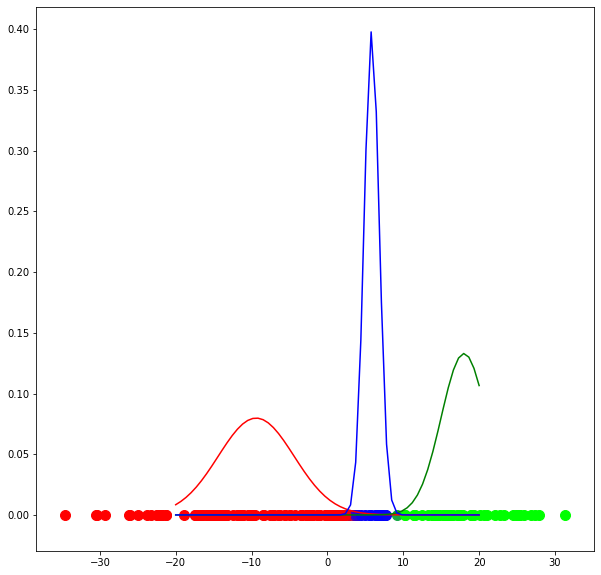

Updated mu=  [-9.30062187 18.02699807  5.95893532]
Updated var=  [array([[83.11547516]]), array([[28.30970886]]), array([[2.35806496]])]


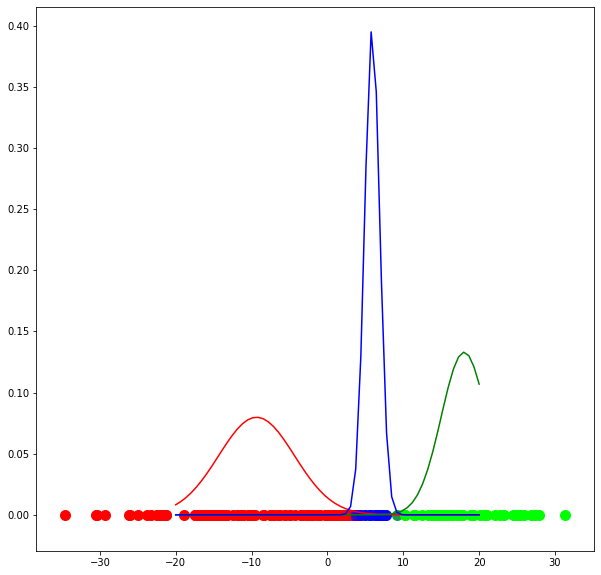

In [11]:
# To run the code - 
data1 = load("dataset1.pkl")
data2 = load("dataset2.pkl")
data3 = load("dataset3.pkl")
data = np.stack((data1,data2,data3)).flatten()   
print (data.shape)
g = GMM1D(data,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1])
g.run()